In [3]:
# Gerekli kütüphaneleri içe aktar
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import stylecloud
from PIL import Image
import matplotlib.pyplot as plt

# NLTK kütüphanesinden gerekli bileşenleri indir
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_and_create_stylecloud(file_path, output_name='stylecloud.png', 
                                     icon_name='fas fa-coffee', lang='turkish'):
    # Metni dosyadan oku
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Türkçe stopwords listesini yükle
    stop_words = set(stopwords.words(lang))

    # Noktalama işaretlerini kaldır
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Metni tokenlere ayır ve küçük harfe çevir
    tokens = word_tokenize(text.lower(), language=lang)

    # Stopwords'ü filtrele
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Filtrelenmiş tokenleri birleştir
    processed_text = ' '.join(filtered_tokens)

    # StyleCloud oluştur
    stylecloud.gen_stylecloud(text=processed_text,
                              icon_name=icon_name,
                              output_name=output_name)
    # Oluşturulan StyleCloud'u göster
    im = Image.open(output_name)
    plt.figure(figsize=(10, 10))
    plt.imshow(im)
    plt.axis('off')  # Eksenleri gizle
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


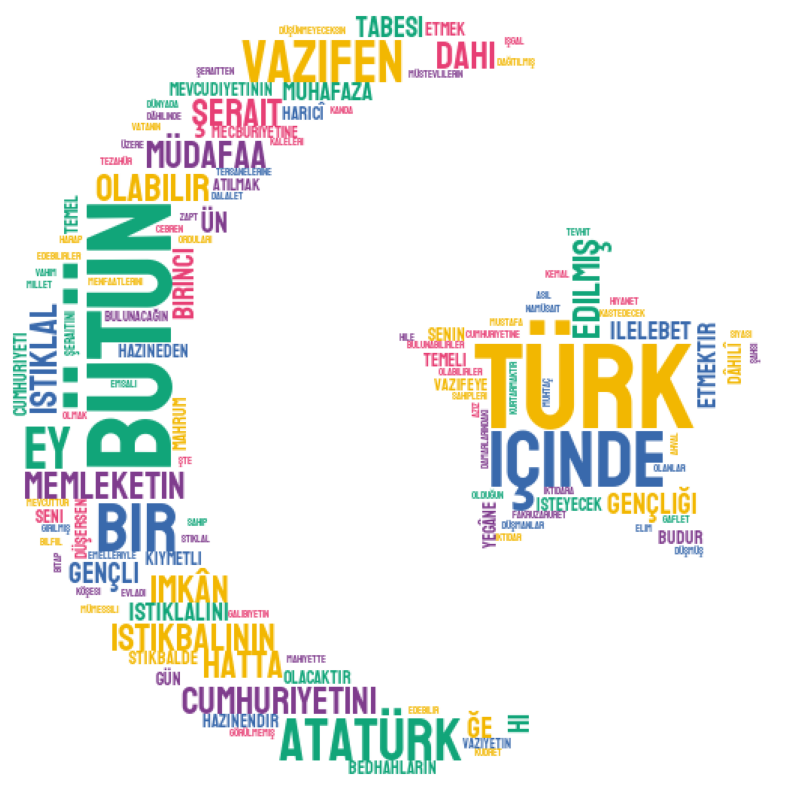

In [4]:

preprocess_and_create_stylecloud(file_path='genclige_hitabe.txt', 
                                 output_name='ay_yildiz.png', icon_name='fas fa-star-and-crescent', lang='turkish')


In [5]:
import gradio as gr
import stylecloud
from PIL import Image
import os

# Ön işleme ve stylecloud oluşturma fonksiyonu
def create_stylecloud(file, language, icon):
    # Dosyanın içeriğini ikili formatta oku ve decode et
    text = file.decode("utf-8")

    # Geçici bir stylecloud dosyası oluştur
    output_file = "stylecloud.png"
    
    # StyleCloud oluştur
    stylecloud.gen_stylecloud(text=text,
                              icon_name=icon,
                              output_name=output_file)
    
    # Oluşturulan dosyanın yolunu döndür (indirme için)
    return output_file

# Gradio arayüzünü oluştur
with gr.Blocks() as demo:
    gr.Markdown("StyleCloud Oluşturucu")
    with gr.Row():
        file_input = gr.File(label="Metin Dosyası Yükle", type="binary")
        language = gr.Radio(choices=["tr", "en"], label="Dil Seçimi", value="tr")
        icon = gr.Dropdown(choices=["fas fa-car", "fas fa-star-and-crescent", "fas fa-trophy", "fas fa-heart"], 
                           label="İkon Seçimi", value="fas fa-star-and-crescent")
    output_file = gr.File(label="Oluşturulan StyleCloud İndir")
    create_button = gr.Button("Oluştur")

    create_button.click(
        create_stylecloud,
        inputs=[file_input, language, icon],
        outputs=output_file
    )

demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://edf8344aa7b128bac7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
